# Example Electrolyzer Run

This is a simple example that simulates a series of electrolyzer stacks running based on a sinusoidal power signal. The `run_electrolyzer` function accepts either a YAML filepath, or a Dictionary representing a valid model specification. The full structure for an electrolyzer model is defined in the source code, in `modeling_schema.yaml`.

In [13]:
import numpy as np

from electrolyzer import run_electrolyzer
from electrolyzer.inputs.validation import load_modeling_yaml

In [2]:
turbine_rating = 3.4  # MW

# Create cosine test signal
test_signal_angle = np.linspace(0, 8 * np.pi, 3600 * 8 + 10)
base_value = (turbine_rating / 2) + 0.2
variation_value = turbine_rating - base_value
power_test_signal = (base_value + variation_value * np.cos(test_signal_angle)) * 1e6

### Approach 1: YAML File

In [14]:
fname_input_modeling = "./modeling_options.yaml"

elec_sys, result_df = run_electrolyzer(fname_input_modeling, power_test_signal)

electrolyzer stack  1 out of  7 has been initialized
electrolyzer stack  2 out of  7 has been initialized
electrolyzer stack  3 out of  7 has been initialized
electrolyzer stack  4 out of  7 has been initialized
electrolyzer stack  5 out of  7 has been initialized
electrolyzer stack  6 out of  7 has been initialized
electrolyzer stack  7 out of  7 has been initialized


`run_electrolyzer` returns a tuple containing the `Supervisor` instance as well as a time-series `pandas.DataFrame`.

In [4]:
type(elec_sys)

electrolyzer.supervisor.Supervisor

In [5]:
result_df.tail()

,power_signal,curtailment,kg_rate,stack_1_deg,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_2_deg,stack_2_fatigue,...,stack_6_deg,stack_6_fatigue,stack_6_cycles,stack_6_uptime,stack_6_kg_rate,stack_7_deg,stack_7_fatigue,stack_7_cycles,stack_7_uptime,stack_7_kg_rate
28805,3.399991e+06,0.0,0.0139,0.00001,6.967001e-07,0.0,28806.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509374e-07,0.0,28801.0,0.002031,0.000008,7.114274e-07,0.0,28800.0,0.001717
28806,3.399995e+06,0.0,0.0139,0.00001,6.967001e-07,0.0,28807.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509374e-07,0.0,28802.0,0.002031,0.000008,7.114274e-07,0.0,28801.0,0.001717
28807,3.399998e+06,0.0,0.0139,0.00001,6.967001e-07,0.0,28808.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509374e-07,0.0,28803.0,0.002031,0.000008,7.114274e-07,0.0,28802.0,0.001717
28808,3.399999e+06,0.0,0.0139,0.00001,6.967001e-07,0.0,28809.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509374e-07,0.0,28804.0,0.002031,0.000008,7.114274e-07,0.0,28803.0,0.001717
28809,3.400000e+06,0.0,0.0139,0.00001,6.967001e-07,0.0,28810.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509374e-07,0.0,28805.0,0.002031,0.000008,7.114274e-07,0.0,28804.0,0.001717


## Approach 2: Dictionary

This is essentially the same process, but the use of a dictionary allows for easier programmatic runs.

In [6]:
modeling_input2 = load_modeling_yaml(fname_input_modeling)

# change the number of stacks
modeling_input2["electrolyzer"]["control"]["n_stacks"] = 6

elec_sys2, result_df2 = run_electrolyzer(modeling_input2, power_test_signal)

electrolyzer stack  1 out of  6 has been initialized
electrolyzer stack  2 out of  6 has been initialized
electrolyzer stack  3 out of  6 has been initialized
electrolyzer stack  4 out of  6 has been initialized
electrolyzer stack  5 out of  6 has been initialized
electrolyzer stack  6 out of  6 has been initialized


In [7]:
result_df2.tail()

,power_signal,curtailment,kg_rate,stack_1_deg,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_2_deg,stack_2_fatigue,...,stack_5_deg,stack_5_fatigue,stack_5_cycles,stack_5_uptime,stack_5_kg_rate,stack_6_deg,stack_6_fatigue,stack_6_cycles,stack_6_uptime,stack_6_kg_rate
28805,3.399991e+06,0.399991,0.012184,0.00001,5.746237e-07,0.0,28806.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509375e-07,0.0,28802.0,0.002031,0.000009,8.412677e-07,0.0,28801.0,0.002031
28806,3.399995e+06,0.399995,0.012184,0.00001,5.746237e-07,0.0,28807.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509375e-07,0.0,28803.0,0.002031,0.000009,8.412677e-07,0.0,28802.0,0.002031
28807,3.399998e+06,0.399998,0.012184,0.00001,5.746237e-07,0.0,28808.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509375e-07,0.0,28804.0,0.002031,0.000009,8.412677e-07,0.0,28803.0,0.002031
28808,3.399999e+06,0.399999,0.012184,0.00001,5.746237e-07,0.0,28809.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509375e-07,0.0,28805.0,0.002031,0.000009,8.412677e-07,0.0,28804.0,0.002031
28809,3.400000e+06,0.400000,0.012184,0.00001,5.746237e-07,0.0,28810.0,0.002031,0.00001,8.509375e-07,...,0.000009,8.509375e-07,0.0,28806.0,0.002031,0.000009,8.412677e-07,0.0,28805.0,0.002031


## Example Usage

<AxesSubplot: title={'center': 'Power Signal'}, xlabel='Time (s)', ylabel='Power (W)'>

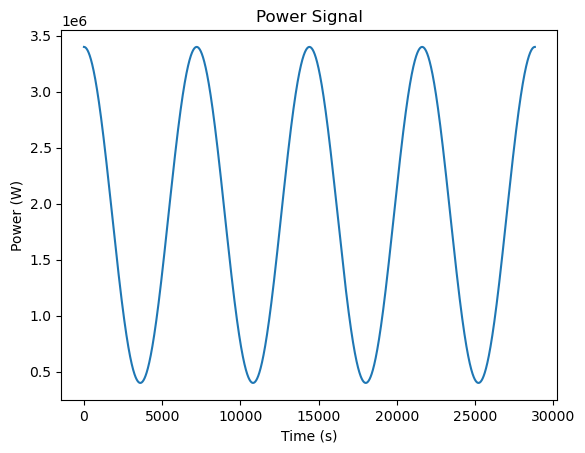

In [8]:
result_df["power_signal"].plot(title="Power Signal", xlabel="Time (s)", ylabel="Power (W)")

<AxesSubplot: title={'center': 'H2 production rate'}, xlabel='Time (s)', ylabel='H2 rate (kg/s)'>

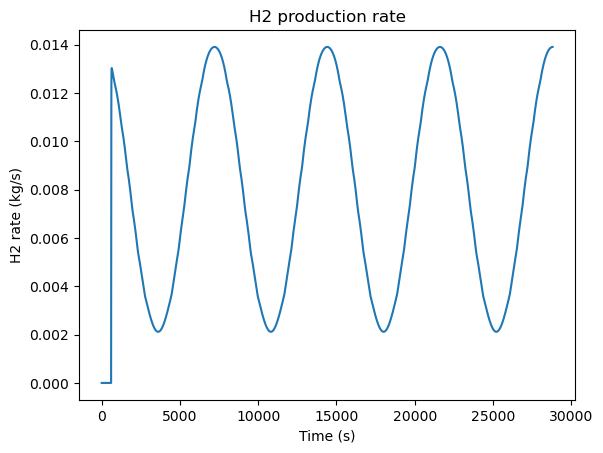

In [9]:
result_df["kg_rate"].plot(title="H2 production rate", xlabel="Time (s)", ylabel="H2 rate (kg/s)")

<AxesSubplot: title={'center': 'H2 production rate by stack'}, xlabel='Time (s)', ylabel='H2 (kg/s)'>

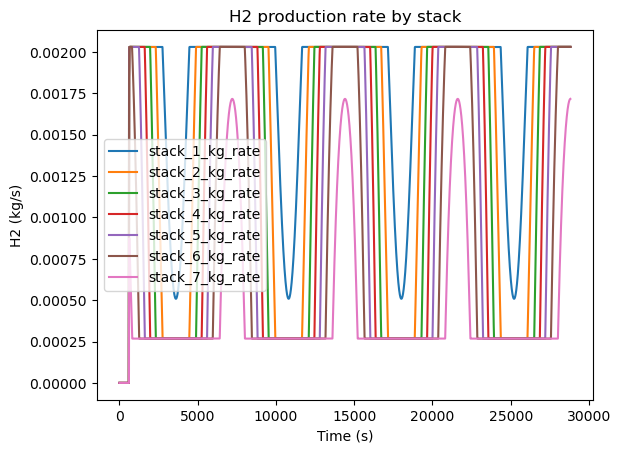

In [10]:
stack_rates = result_df[[col for col in result_df.columns if "_kg_rate" in col]]

stack_rates.plot(title="H2 production rate by stack", xlabel="Time (s)", ylabel="H2 (kg/s)")

<AxesSubplot: title={'center': 'Degradation by stack'}, xlabel='Time (s)', ylabel='Degradation (V)'>

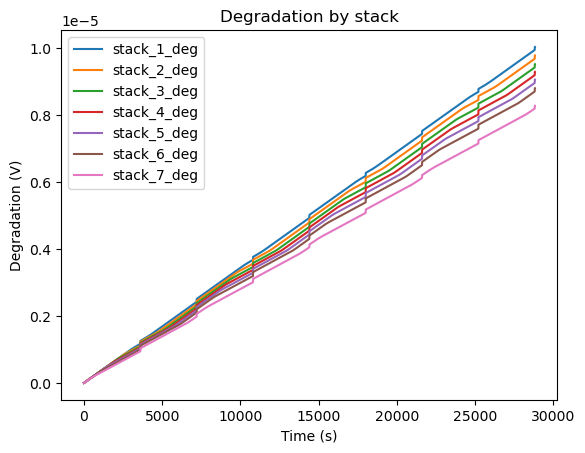

In [11]:
deg = result_df[[col for col in result_df.columns if "deg" in col]]
deg.plot(title="Degradation by stack", xlabel="Time (s)", ylabel="Degradation (V)")

In [12]:
# Total kg
result_df["kg_rate"].sum()

222.87991746974592